### Problem Statement:
Wine is a beverage made from fermented grapes and other fruit juices with a low amount of alcohol content. Wine is the second most popular alcoholic drink in the world after beer, and it is one of the most highly consumed beverages.

Generally, the quality of wine is graded based on the taste of the wine and vintage but this process is time-consuming, costly, and not efficient as the quality of the wine also depends on other physiochemical attributes like fixed acidity, volatile acidity, etc. Also, it is not always possible to ensure wine quality by experts when there is a huge demand for the product as it will increase the cost significantly.

Moonshine is a red wine company that produces premium high-quality wines. The company wants to improve its production efficiency and reduce the cost and additional time involved in wine tasting.

You as a data scientist at Moonshine company have to build a predictive model that can help to identify the premium quality wines using the available data.

### Objective:
To build a model to predict the quality of the wine.

### Data Description:
- fixed acidity: Fixed Acidity impart sourness and resist microbial infection, measured in no. of grams of tartaric acid per dm3
- volatile acidity: No. of grams of acetic acid per dm3 of wine. Too high levels can lead to an unpleasant, vinegar-like taste
- citric acid: No. of grams of citric acid per dm3 of wine. Citric acid can add freshness and flavor to wines
- residual sugar: Remaining sugar after fermentation stops, measured in no. of grams per dm3.
- chlorides: No. of grams of sodium chloride i.e. salt per dm3 of wine
- free sulfur dioxide: No. of grams of free sulfite per dm3 of wine
- total sulfur dioxide: No. of grams of total sulfite (free sulphite+ bound) per dm3 of wine
- density: Density in gram per cm3
- pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic). The pH of the wine can help measure the ripeness of the wine
- sulphates: No. of grams of potassium sulfate per dm3 of wine
- alcohol: Volume of alcohol in percentage
- quality: Wine quality score between 3 to 8

#### Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_auc_score

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('winequality-red.csv', sep=";")

In [3]:
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df['quality'].unique()

bin = (2,6,8)
labels = ["premium", "non-premium"]
df['quality_class'] = pd.cut(x=data['quality'], bins=bin, labels = labels)

In [12]:
df['quality_class'].value_counts()

premium        1382
non-premium     217
Name: quality_class, dtype: int64

### Model Building - Approach
- Data preparation
- Split the data into the train and test set.
- Train models on the training data.
- Try to improve the model performance using hyperparameter tuning.
- Test the performance on the test data.

In [13]:
df.drop(['quality'], inplace=True, axis=1)
X = df.drop(['quality_class'], axis=1)
y = df['quality_class'].apply(lambda x:0 if x=="non-premium" else 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=1)
X_train.shape, X_test.shape

((1119, 11), (480, 11))

### Model evaluation criterion

#### The model can make wrong predictions as:

- Predicting a wine is of premium quality when it is of non-premium quality.
- Predicting a wine is of non-premium quality when it is of premium quality.


#### Which case is more important?
- If the model predicts a wine is of non-premium quality but it is of premium quality then the company would incur the loss of good wine and resources used.
- If the model predicts a wine is of premium quality but it is not then the company would roll out low-quality wine which would affect their customer base and their reputation.


#### Which metric to optimize?
We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

In [16]:
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred)
    precision = precision_score(target, pred)
    recall = recall_score(target, pred)
    f1 = f1_score(target, pred)
    
    df_perf = pd.DataFrame({"Accuracy": acc, "Precision": precision, "Recall": recall, "F1": f1}, index = [0],)
    
    return df_perf

In [17]:
def confusion_matrix_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    cm = confusion_matrix(target, pred)
    labels = np.asarray([
        ["{0:0.0f}".format(item) + "\n {0:.2%}".format(item/cm.flatten().sum())]
        for item in cm.flatten()
    ]).reshape(2,2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Classifier

Training Performance:    Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0
Testing Performance:    Accuracy  Precision   Recall        F1
0  0.885417   0.936893  0.93012  0.933495


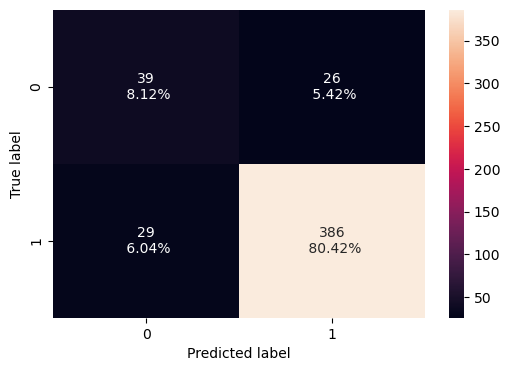

In [18]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)


d_tree_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
d_tree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)

print("Training Performance:", d_tree_model_train_perf)
print("Testing Performance:", d_tree_model_test_perf)

confusion_matrix_sklearn(d_tree, X_test, y_test)

### Hyperparameter tuning

In [25]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18, 1:0.72}, random_state=1)
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes":  [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring = scorer, n_jobs =-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

In [19]:
np.arange(2,30)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

Training Performance    Accuracy  Precision    Recall        F1
0  0.915103   0.914449  0.994829  0.952947
Testing Performance    Accuracy  Precision    Recall        F1
0  0.895833   0.904656  0.983133  0.942263


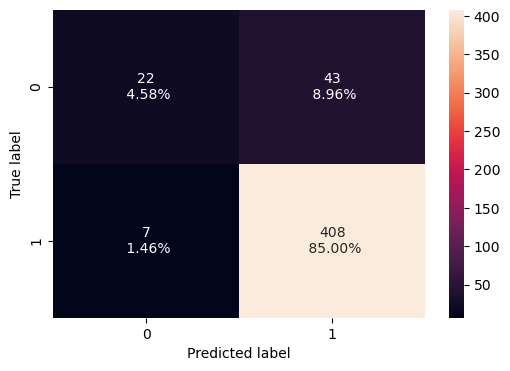

In [27]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test, y_test)

print("Training Performance", dtree_estimator_model_train_perf)
print("Testing Performance", dtree_estimator_model_test_perf)

confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

### Random Forest Classifier

Training Performance    Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0
Testing Performance    Accuracy  Precision    Recall        F1
0  0.908333   0.918736  0.980723  0.948718


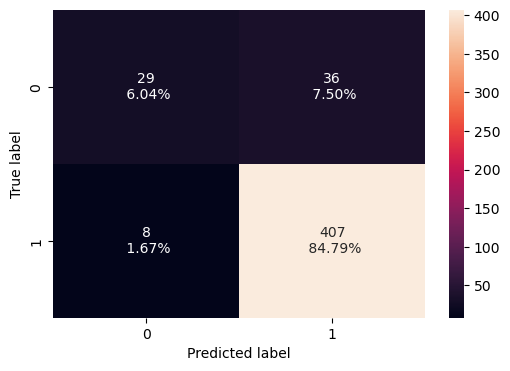

In [28]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)

print("Training Performance", rf_estimator_model_train_perf)
print("Testing Performance", rf_estimator_model_test_perf)

confusion_matrix_sklearn(rf_estimator, X_test, y_test)

### Hyperparameter Tuning

In [31]:
rf_tuned = RandomForestClassifier(class_weight={0:0.18, 1:0.72}, random_state=1)
parameters = {
    "max_depth": list(np.arange(5,30,5)) + [None],
    "max_features": ["log2","sqrt", None],
    "min_samples_leaf": np.arange(1,15,5),
    "min_samples_split": np.arange(2,20,5),
    "n_estimators":[10,110,10]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, parameters, cv=5, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=15,
                       max_features='log2', n_estimators=110, random_state=1)

Training Performance    Accuracy  Precision  Recall        F1
0  0.999106   0.998967     1.0  0.999483
Testing Performance    Accuracy  Precision    Recall        F1
0  0.902083   0.918182  0.973494  0.945029


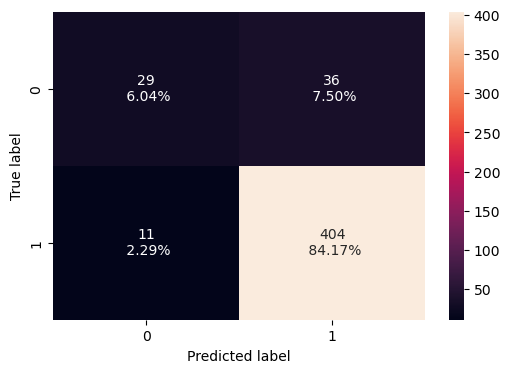

In [32]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)

print("Training Performance",rf_tuned_model_train_perf)
print("Testing Performance", rf_tuned_model_test_perf)

confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### Bagging Classifier

Training Performance    Accuracy  Precision    Recall        F1
0  0.992851   0.995863  0.995863  0.995863
Testing Performance    Accuracy  Precision    Recall        F1
0   0.90625   0.934272  0.959036  0.946492


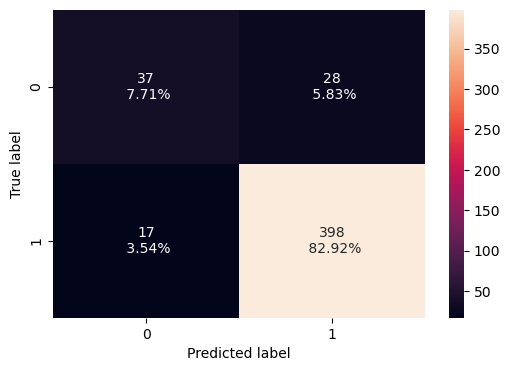

In [33]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)

print("Training Performance", bagging_classifier_model_train_perf)
print("Testing Performance", bagging_classifier_model_test_perf)

confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### Hyperparameter tuning

In [35]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)
parameters = {
    "max_samples": [0.7,0.8,0.9,1],
    "max_features": [0.7, 0.8, 0.9,1],
    "n_estimators": [10,20,30,40,50]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=30,
                  random_state=1)

Training Performance    Accuracy  Precision  Recall        F1
0  0.997319   0.996907     1.0  0.998451
Testing Performance    Accuracy  Precision    Recall       F1
0  0.897917   0.915909  0.971084  0.94269


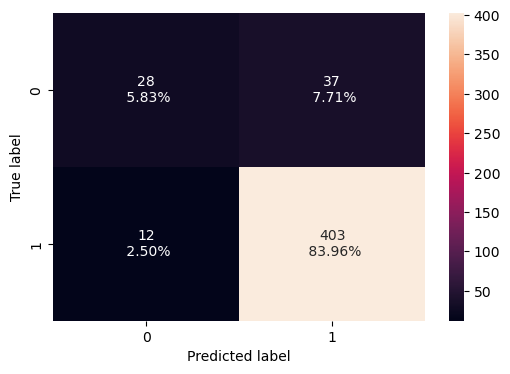

In [36]:
bagging_estimator_tuned_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)

print("Training Performance",bagging_estimator_tuned_train_perf)
print("Testing Performance",bagging_estimator_tuned_test_perf)

confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### AdaBoostClassifier

Training Performance    Accuracy  Precision    Recall        F1
0  0.909741   0.922852  0.977249  0.949272
Testing Performance    Accuracy  Precision    Recall       F1
0  0.891667    0.91344  0.966265  0.93911


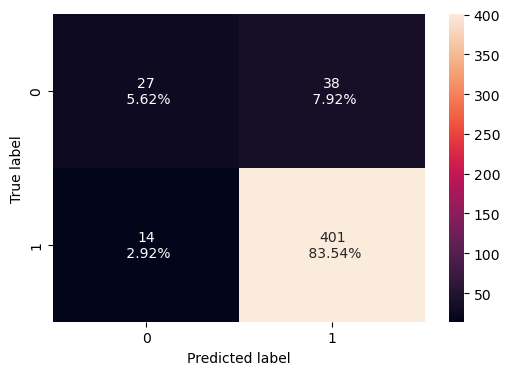

In [38]:
ada_classifier = AdaBoostClassifier(random_state=1)
ada_classifier.fit(X_train, y_train)

ada_classifier_train_perf = model_performance_classification_sklearn(ada_classifier, X_train, y_train)
ada_classifier_test_perf = model_performance_classification_sklearn(ada_classifier, X_test, y_test)

print("Training Performance", ada_classifier_train_perf)
print("Testing Performance", ada_classifier_test_perf)

confusion_matrix_sklearn(ada_classifier, X_test, y_test)

### Hyperparameter tuning

In [41]:
ada_boost_classifier_tuned = AdaBoostClassifier(random_state=1)
parameters = {
    "base_estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    "n_estimators": [10,110,10],
    "learning_rate": np.arange(0.1,2,0.1)
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(ada_boost_classifier_tuned, parameters, scoring = scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

ada_boost_classifier_tuned = grid_obj.best_estimator_
ada_boost_classifier_tuned.fit(X_test, y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.2, n_estimators=110, random_state=1)

Training Performance    Accuracy  Precision    Recall        F1
0  0.892761   0.913171  0.967942  0.939759
Testing Performance    Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0


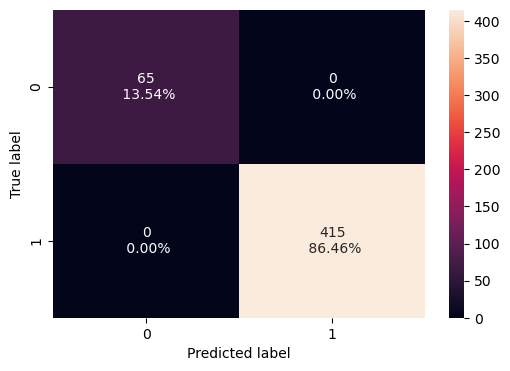

In [42]:
ada_boost_classifier_tuned_train_perf = model_performance_classification_sklearn(ada_boost_classifier_tuned, X_train, y_train)
ada_boost_classifier_tuned_test_perf = model_performance_classification_sklearn(ada_boost_classifier_tuned, X_test, y_test)

print("Training Performance", ada_boost_classifier_tuned_train_perf)
print("Testing Performance", ada_boost_classifier_tuned_test_perf)

confusion_matrix_sklearn(ada_boost_classifier_tuned, X_test, y_test)

### Gradient Boosting Classifier

Training Performance    Accuracy  Precision  Recall        F1
0  0.970509      0.967     1.0  0.983223
Testing Performance    Accuracy  Precision    Recall        F1
0       0.9     0.9161  0.973494  0.943925


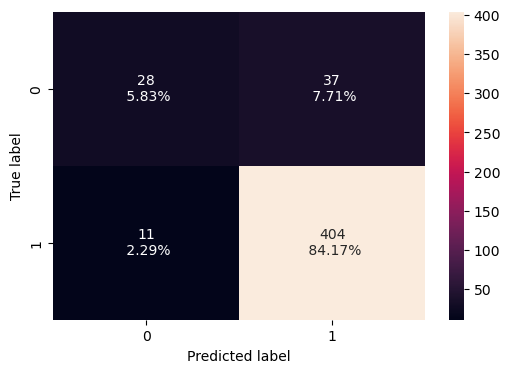

In [43]:
gradient_boosting_classifier = GradientBoostingClassifier(random_state=1)
gradient_boosting_classifier.fit(X_train, y_train)

gradient_boosting_classifier_train_perf = model_performance_classification_sklearn(gradient_boosting_classifier, X_train, y_train)
gradient_boosting_classifier_test_perf = model_performance_classification_sklearn(gradient_boosting_classifier, X_test, y_test)

print("Training Performance",gradient_boosting_classifier_train_perf )
print("Testing Performance",gradient_boosting_classifier_test_perf)

confusion_matrix_sklearn(gradient_boosting_classifier, X_test, y_test)

### Hyperparameter tuning

In [44]:
gradient_boosting_classifier_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

parameters = {
    "n_estimators": [100, 150,200, 250],
    "subsample": [0.8,0.9,1],
    "max_features": [0.7,0.8,0.9,1]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gradient_boosting_classifier_tuned, parameters, scoring= scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gradient_boosting_classifier_tuned = grid_obj.best_estimator_

gradient_boosting_classifier_tuned.fit(X_test, y_test)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=250, random_state=1,
                           subsample=0.9)

Training Performance    Accuracy  Precision    Recall        F1
0  0.879357    0.90625  0.959669  0.932195
Testing Performance    Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0


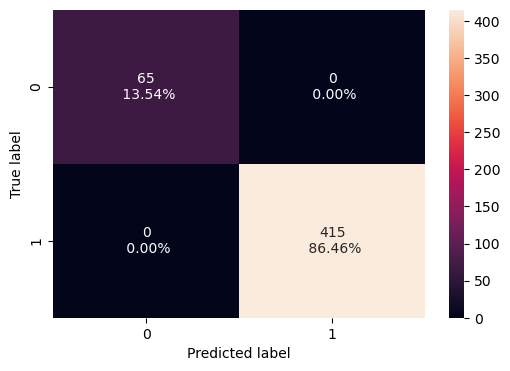

In [45]:
gradient_boosting_classifier_tuned_train_perf = model_performance_classification_sklearn(gradient_boosting_classifier_tuned, X_train, y_train)
gradient_boosting_classifier_tuned_test_perf = model_performance_classification_sklearn(gradient_boosting_classifier_tuned, X_test, y_test)

print("Training Performance", gradient_boosting_classifier_tuned_train_perf)
print("Testing Performance", gradient_boosting_classifier_tuned_test_perf)

confusion_matrix_sklearn(gradient_boosting_classifier_tuned, X_test, y_test)

In [47]:
from xgboost import XGBClassifier

### XGBoost Classifier

[04:25:18] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_matic" } are not used.

Training Performance    Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0
Testing Performance    Accuracy  Precision    Recall        F1
0  0.897917    0.92757  0.956627  0.941874


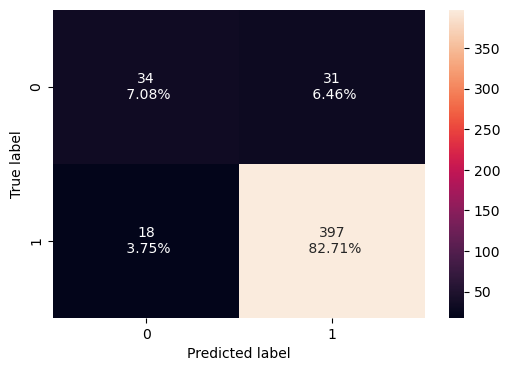

In [48]:
xgb_classifier = XGBClassifier(random_state=1, eval_matic= "logloss")
xgb_classifier.fit(X_train, y_train)

xgb_classifier_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)

print("Training Performance", xgb_classifier_train_perf)
print("Testing Performance", xgb_classifier_test_perf)

confusion_matrix_sklearn(xgb_classifier , X_test, y_test)

### Hyperparameter Tuning

In [52]:
xgb_classifier_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight": [1,2,5],
    "subsample": [0.7, 0.9,1],
    "learning_rate": [0.05, 0.1,0.2],
    "colsample_bytree": [0.7, 0.9,1],
    "colsample_bylevel": [0.5,0.7,1]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_classifier_tuned,parameters, cv=5, scoring = scorer )
grid_obj = grid_obj.fit(X_train, y_train)

xgb_classifier_tuned = grid_obj.best_estimator_

xgb_classifier_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training Performance    Accuracy  Precision  Recall        F1
0  0.998213   0.997936     1.0  0.998967
Testing Performance    Accuracy  Precision    Recall        F1
0    0.8875   0.916859  0.956627  0.936321


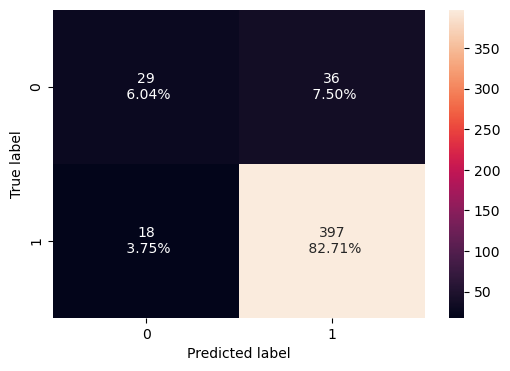

In [53]:
xgb_classifier_tuned_train_perf = model_performance_classification_sklearn(xgb_classifier_tuned, X_train, y_train)
xgb_classifier_tuned_test_perf = model_performance_classification_sklearn(xgb_classifier_tuned, X_test, y_test)

print("Training Performance", xgb_classifier_tuned_train_perf)
print("Testing Performance", xgb_classifier_tuned_test_perf)

confusion_matrix_sklearn(xgb_classifier_tuned, X_test, y_test)

### Stacking Classifier

In [54]:
estimators = [('Random Forest', rf_tuned), ('Gradient Boosting', gradient_boosting_classifier_tuned), ('Decision Tree',dtree_estimator)]
final_estimator = xgb_classifier_tuned

stacking_classifier = StackingClassifier(estimators= estimators, final_estimator = final_estimator)
stacking_classifier.fit(X_train, y_train)


StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.72},
                                                       max_depth=15,
                                                       max_features='log2',
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
                                DecisionTreeClassi...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training Performance    Accuracy  Precision    Recall        F1
0  0.991063   0.991778  0.997932  0.994845
Testing Performance    Accuracy  Precision    Recall        F1
0  0.891667   0.919169  0.959036  0.938679


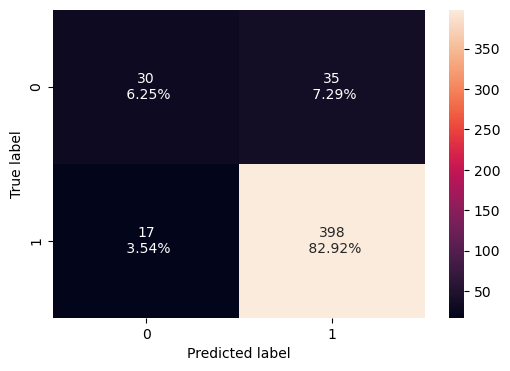

In [55]:
stacking_classifier_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)

print("Training Performance", stacking_classifier_train_perf)
print("Testing Performance", stacking_classifier_test_perf)

confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

### Comparing All Models

In [56]:
model_train_comp_df = pd.concat([d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,
                                rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_train_perf.T,
                                 ada_classifier_train_perf.T,ada_boost_classifier_tuned_train_perf.T, gradient_boosting_classifier_train_perf.T,
                                 gradient_boosting_classifier_tuned_train_perf.T,xgb_classifier_train_perf.T, xgb_classifier_tuned_train_perf.T,
                                 stacking_classifier_train_perf.T
                                ], axis=1)
model_train_comp_df.columns=["Decision Tree", "Decision Tree Estimator", "Random Forest", "Random Forest Tuned",
                            "Bagging Classifier", "Bagging Estimator Tuned", "Adaboost Classifier", "AdaBoostClassifier Tuned",
                             "Gradient Boost Classifier", "Gradient Boost Classifier Tuned", "XGBoost Classifier",
                             "XGBoost Classifier Tuned", "Stacking Classifier"
                            ]

print("Training Performance comparison")


Training Performance comparison


,Decision Tree,Decision Tree Estimator,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,AdaBoostClassifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.915103,1.0,0.999106,0.992851,0.997319,0.909741,0.892761,0.970509,0.879357,1.0,0.998213,0.991063
Precision,1.0,0.914449,1.0,0.998967,0.995863,0.996907,0.922852,0.913171,0.967000,0.906250,1.0,0.997936,0.991778
Recall,1.0,0.994829,1.0,1.000000,0.995863,1.000000,0.977249,0.967942,1.000000,0.959669,1.0,1.000000,0.997932
F1,1.0,0.952947,1.0,0.999483,0.995863,0.998451,0.949272,0.939759,0.983223,0.932195,1.0,0.998967,0.994845


In [57]:
model_test_comp_df = pd.concat([
    d_tree_model_test_perf.T, dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T, bagging_classifier_model_test_perf.T, bagging_estimator_tuned_test_perf.T,
    ada_classifier_test_perf.T, ada_boost_classifier_tuned_test_perf.T,gradient_boosting_classifier_test_perf.T,
    gradient_boosting_classifier_tuned_test_perf.T, xgb_classifier_test_perf.T, xgb_classifier_tuned_test_perf.T,
    stacking_classifier_test_perf.T
], axis=1)

model_test_comp_df.columns = ["Decision Tree", "Decision Tree Estimator", "Random Forest", "Random Forest Tuned",
                            "Bagging Classifier", "Bagging Estimator Tuned", "Adaboost Classifier", "AdaBoostClassifier Tuned",
                             "Gradient Boost Classifier", "Gradient Boost Classifier Tuned", "XGBoost Classifier",
                             "XGBoost Classifier Tuned", "Stacking Classifier"]
print("Testing Performance comparison")
model_test_comp_df

Testing Performance comparison


,Decision Tree,Decision Tree Estimator,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,AdaBoostClassifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.885417,0.895833,0.908333,0.902083,0.906250,0.897917,0.891667,1.0,0.900000,1.0,0.897917,0.887500,0.891667
Precision,0.936893,0.904656,0.918736,0.918182,0.934272,0.915909,0.913440,1.0,0.916100,1.0,0.927570,0.916859,0.919169
Recall,0.930120,0.983133,0.980723,0.973494,0.959036,0.971084,0.966265,1.0,0.973494,1.0,0.956627,0.956627,0.959036
F1,0.933495,0.942263,0.948718,0.945029,0.946492,0.942690,0.939110,1.0,0.943925,1.0,0.941874,0.936321,0.938679


### Feature importance of Tuned Random Forest

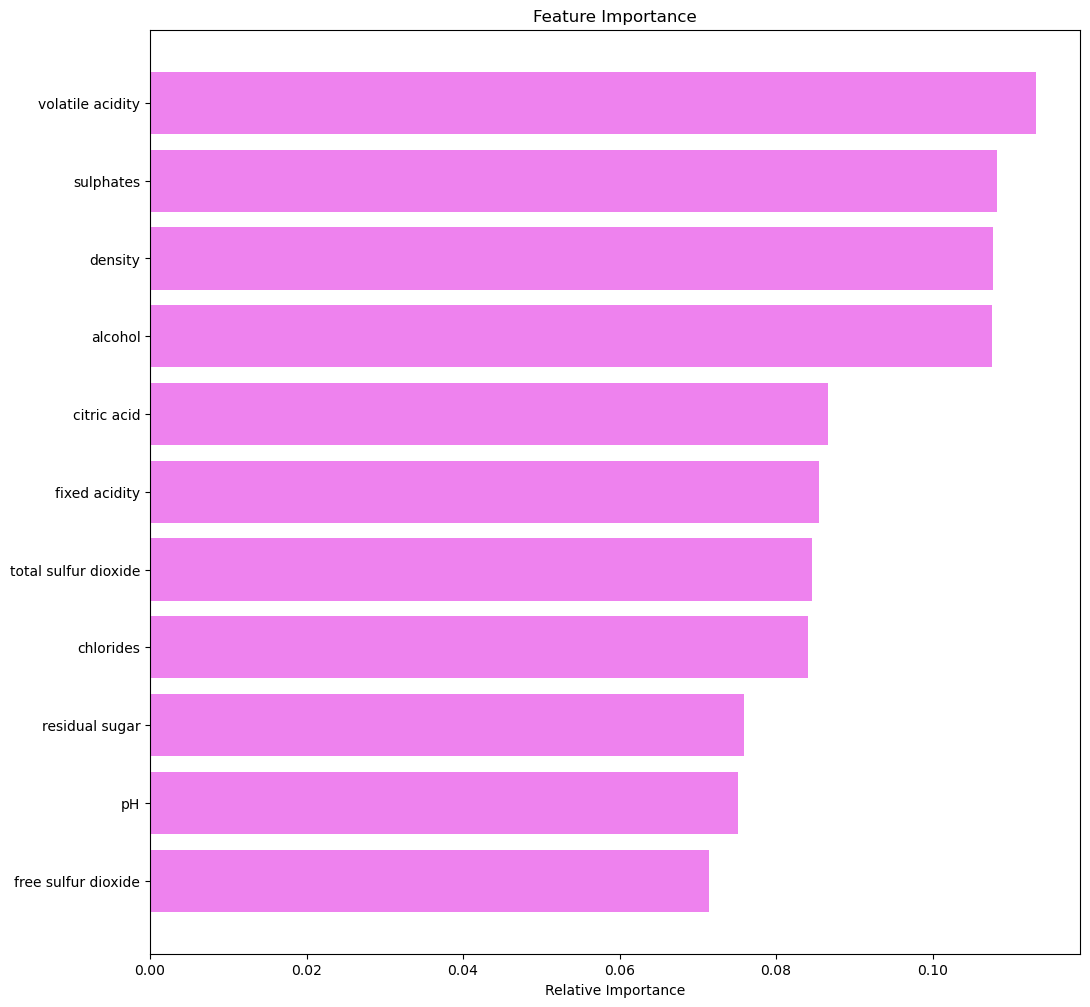

In [62]:
feature_names =  X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()